In [3]:
import numpy as np
import struct
import requests
import cPickle
import gzip
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from multiprocessing import Process, Queue
%matplotlib inline

In [2]:
# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()
train_image = train_set[0]
train_label = train_set[1]
valid_image = valid_set[0]
valid_label = valid_set[1]
test_image = test_set[0]
test_label = test_set[1]
train_image = np.concatenate((train_image, valid_image))
train_label = np.concatenate((train_label, valid_label))
print "Data loaded"

Data loaded


2


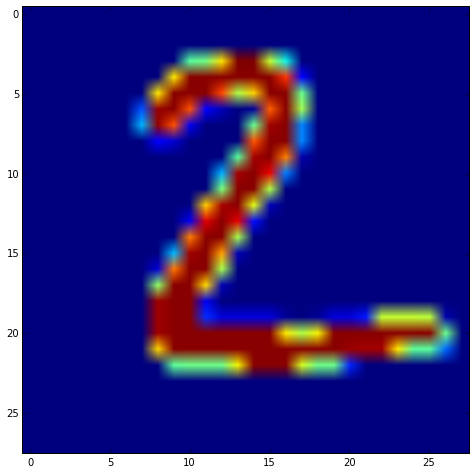

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(np.reshape(test_set[0][1],(28,28)))
print test_set[1][1]

In [4]:
train_image_0 = []
train_image_1 = []
train_image_2 = []
train_image_3 = []
train_image_4 = []
train_image_5 = []
train_image_6 = []
train_image_7 = []
train_image_8 = []
train_image_9 = []
train_label_0 = []
train_label_1 = []
train_label_2 = []
train_label_3 = []
train_label_4 = []
train_label_5 = []
train_label_6 = []
train_label_7 = []
train_label_8 = []
train_label_9 = []

In [5]:
for i in range(len(train_label)):
    if i % 1000 == 0:
        print i
    if train_label[i] == 0:
        image_0.append(train_image[i])
        label_0.append(train_label[i])
        continue
    if train_label[i] == 1:
        image_1.append(train_image[i])
        label_1.append(train_label[i])
        continue
    if train_label[i] == 2:
        image_2.append(train_image[i])
        label_2.append(train_label[i])
        continue
    if train_label[i] == 3:
        image_3.append(train_image[i])
        label_3.append(train_label[i])
        continue
    if train_label[i] == 4:
        image_4.append(train_image[i])
        label_4.append(train_label[i])
        continue
    if train_label[i] == 5:
        image_5.append(train_image[i])
        label_5.append(train_label[i])
        continue
    if train_label[i] == 6:
        image_6.append(train_image[i])
        label_6.append(train_label[i])
        continue
    if train_label[i] == 7:
        image_7.append(train_image[i])
        label_7.append(train_label[i])
        continue
    if train_label[i] == 8:
        image_8.append(train_image[i])
        label_8.append(train_label[i])
        continue
    if train_label[i] == 9:
        image_9.append(train_image[i])
        label_9.append(train_label[i])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


In [7]:
print len(label_0)
print len(label_1)
print len(label_2)

5923
6742
5958


In [30]:
# k-means prototype
M = 5000
model = KMeans(n_clusters=M/10)
model.fit(image_0)
prototype_image = model.cluster_centers_
prototype_label = [0] * (M/10)

In [34]:
# k-means prototype
M = 10000
model = KMeans(n_clusters=M/10)
model.fit(image_0)
prototype_image = model.cluster_centers_
prototype_label = [0] * (M/10)
model.fit(image_1)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [1] * (M/10)))
print 1
model.fit(image_2)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [2] * (M/10)))
print 2
model.fit(image_3)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [3] * (M/10)))
print 3
model.fit(image_4)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [4] * (M/10)))
print 4
model.fit(image_5)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [5] * (M/10)))
print 5
model.fit(image_6)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [6] * (M/10)))
print 6
model.fit(image_7)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [7] * (M/10)))
print 7
model.fit(image_8)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [8] * (M/10)))
print 8
model.fit(image_9)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [9] * (M/10)))
print 9

1
2
3
4
5
6
7
8
9


In [35]:
print np.array(prototype_image).shape
print np.array(prototype_label).shape

(10000, 784)
(10000,)


In [36]:
# test
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(prototype_image)
correct_classified = 0
for i in range(len(test_label)):
    if i % 500 == 0:
        print i
    neigh_index = neigh.kneighbors(test_image[i], return_distance=False)
    if test_label[i] == prototype_label[neigh_index]:
        correct_classified += 1
print "error rate = ", 1.0 - correct_classified * 1.0 / len(test_label)
print "Done"

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
error rate =  0.0288
Done


In [9]:
# random prototype
M = 10000
random_index = random.sample(range(len(train_label)),M)
prototype_image = []
prototype_label = []
for i in range(len(random_index)):
    if i% 100 == 0:
        print i
    prototype_image.append(train_image[random_index[i]])
    prototype_label.append(train_label[random_index[i]])
print len(prototype_image)
print len(prototype_label)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10000


In [10]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(prototype_image)
correct_classified = 0
for i in range(len(test_label)):
    if i % 1000 == 0:
        print i
    neigh_index = neigh.kneighbors(test_image[i], return_distance=False)
    if test_label[i] == prototype_label[neigh_index]:
        correct_classified += 1
print "error rate = ", 1.0 - correct_classified * 1.0 / len(test_label)
print "Done"

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
error rate =  0.0508
Done


/Users/zq/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [20]:
# prototype selection
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(train_image)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_neighbors=2, p=2, radius=1.0)

In [21]:
prototype_diff_image = []
prototype_same_image = []
prototype_diff_label = []
prototype_same_label = []
for i in range(len(train_label)):
    if i % 500 == 0:
        print i
    neigh_index = neigh.kneighbors(train_image[i], return_distance=False)
    if train_label[neigh_index[0][0]] == train_label[neigh_index[0][1]]:
        prototype_same_image.append(train_image[i])
        prototype_same_label.append(train_label[i])
    else:
        prototype_diff_image.append(train_image[i])
        prototype_diff_label.append(train_label[i])

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500


In [22]:
print len(prototype_same_label)
print len(prototype_diff_label)

58423
1577


In [28]:
print np.array(prototype_diff_image).shape
print np.array(prototype_same_image[:(M-1577)]).shape

(1577, 784)
(3423, 784)


In [32]:
#1
M = 10000
if len(prototype_diff_label) < M:
    prototype_image = np.concatenate((prototype_diff_image, prototype_same_image[:(M-len(prototype_diff_label))]))
    prototype_label = np.concatenate((prototype_diff_label, prototype_same_label[:(M-len(prototype_diff_label))]))
else:
    prototype_image = prototype_diff_image[:M]
    prototype_label = prototype_diff_label[:M]

In [35]:
#2
M = 10000
prototype_image = np.concatenate((prototype_diff_image[:500], prototype_same_image[:(M-500)]))
prototype_label = np.concatenate((prototype_diff_label[:500], prototype_same_label[:(M-500)]))

In [38]:
#3
M = 10000
prototype_image = prototype_same_image[:M]
prototype_label = prototype_same_label[:M]

In [40]:
#4
M = 1000
random_index = random.sample(range(len(prototype_diff_label)),100)
prototype_image = []
prototype_label = []
for i in range(len(random_index)):
    if i% 100 == 0:
        print i
    prototype_image.append(prototype_diff_image[random_index[i]])
    prototype_label.append(prototype_diff_label[random_index[i]])
random_index = random.sample(range(len(prototype_same_label)),900)
for i in range(len(random_index)):
    if i% 100 == 0:
        print i
    prototype_image.append(prototype_same_image[random_index[i]])
    prototype_label.append(prototype_same_label[random_index[i]])

0
0
100
200
300
400
500
600
700
800


In [41]:
print np.array(prototype_image).shape
print np.array(prototype_label).shape

(1000, 784)
(1000,)


In [42]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(prototype_image)
correct_classified = 0
for i in range(len(test_label)):
    if i % 500 == 0:
        print i
    neigh_index = neigh.kneighbors(test_image[i], return_distance=False)
    if test_label[i] == prototype_label[neigh_index]:
        correct_classified += 1
print "error rate = ", 1.0 - correct_classified * 1.0 / len(test_label)
print "Done"

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
error rate =  0.1231
Done


/Users/zq/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
